In [28]:
""" This script is for simple linear regression : ML 101
we'll use a regression exemple generated by sklearn.datasets and we'll construct the model from scratch
we'll use a linear function for the model then a polynomial one
Since we'll use only one feature to predict one variable, it's a simple linear regression
For the solution we'll use least squares and gradient descent
LET'S GO !!"""

" This script is for simple linear regression : ML 101\nwe'll use a regression exemple generated by sklearn.datasets and we'll construct the model from scratch\nwe'll use a linear function for the model then a polynomial one\nSince we'll use only one feature to predict one variable, it's a simple linear regression\nFor the solution we'll use least squares and gradient descent\nLET'S GO !!"

# Importing Libraries

In [29]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from time import time

# Data Generation

In [30]:
"""Here we create two numpy arrays X, Y that present the regression
We need to make sure of the dimensions """

'Here we create two numpy arrays X, Y that present the regression\nWe need to make sure of the dimensions '

In [31]:
X, Y = make_regression(n_features = 1, n_samples = 500, noise = 10)

In [32]:
Y = Y.reshape(X.shape[0],1)

In [33]:
print(X.shape, Y.shape)

(500, 1) (500, 1)


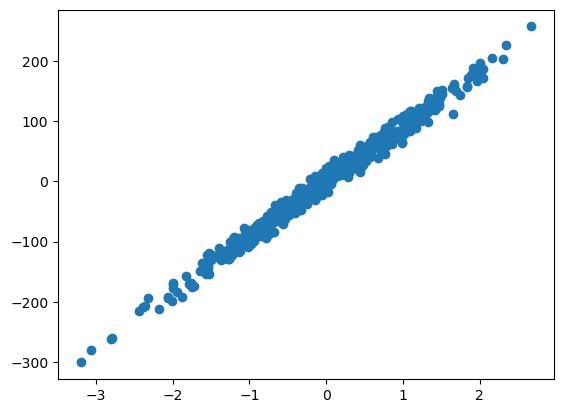

In [34]:
plt.scatter(X,Y)

# Model

In [35]:
"""We can see from the scatter that there is a type of relationship between X and Y close to a linear function
we will try first a linear function as a model then a polynomial function 
We use the Matrix representation"""

'We can see from the scatter that there is a type of relationship between X and Y close to a linear function\nwe will try first a linear function as a model then a polynomial function \nWe use the Matrix representation'

In [36]:
def model(X, THETA):
    return X.dot(THETA)

# MSE : Mean Squared Error _ Cost function

In [37]:
"""We use the mean squared error to calculate the difference between real values and predicted ones by a model"""

'We use the mean squared error to calculate the difference between real values and predicted ones by a model'

In [38]:
def MSE(X, Y, THETA):
    return 1/(2*X.shape[0])*np.sum((model(X, THETA)-Y)**2)

# Gradient

In [39]:
def grad(X, Y, THETA):
    return 1/len(Y)*X.T.dot(X.dot(THETA)-Y)

# Gradient Descent 

In [40]:
"""Now the gradient descent with the hyper_parameter of learning rate & the number of itteration
Rq : for the least squares the det of X is 0 --> X has features with a linear relationship"""

'Now the gradient descent with the hyper_parameter of learning rate & the number of itteration\nRq : for the least squares the det of X is 0 --> X has features with a linear relationship'

In [41]:
def gradient_descent(X, Y, THETA, learning_rate, nbr_itterations):
    cost_history = np.ones(nbr_itterations)
    for i in range(nbr_itterations):
        THETA = THETA - learning_rate*grad(X,Y,THETA)
        cost_history[i] = MSE(X, Y, THETA)
    return THETA, cost_history

# Coefficient of Determination

In [42]:
"""We use the coefficient of determination to evaluate the performance of our model"""

'We use the coefficient of determination to evaluate the performance of our model'

In [43]:
def R2(Y, pred):
    u = ((Y-pred)**2).sum()
    v = ((Y-Y.mean())**2).sum()
    return 1-u/v

# Training & parameters

In [44]:
THETA1 = np.random.randn(2,1)
THETA2 = np.random.randn(3,1)
print(THETA1, THETA2, sep="\n")

[[ 2.46730845]
 [-0.10535659]]
[[ 0.31376774]
 [-1.15378968]
 [ 0.15356898]]


(500, 2) (500, 3) (500, 1)


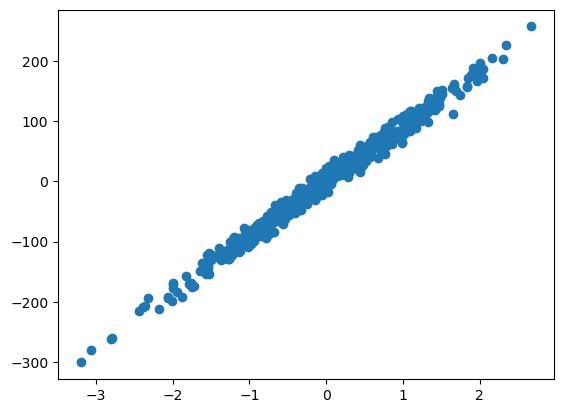

In [45]:
plt.scatter(X, Y)
X1 = np.hstack((X, np.ones(X.shape)))
X2 = np.hstack((np.hstack((X**2, X)),np.ones(X.shape)))
print(X1.shape, X2.shape, Y.shape)

In [46]:
learning_rate = 0.03
itterations = 300

In [47]:
# Linear Model
start = time()
THETA, COST = gradient_descent(X1, Y, THETA1, learning_rate, itterations)

print("Training time : ", time()-start)

Training time :  0.022312641143798828


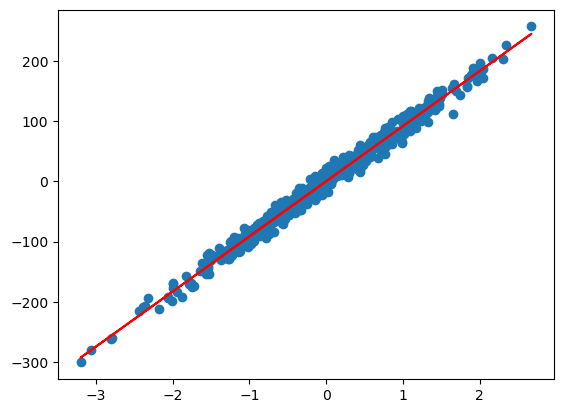

In [48]:
plt.scatter(X,Y)
plt.plot(X, model(X1, THETA), c='red')

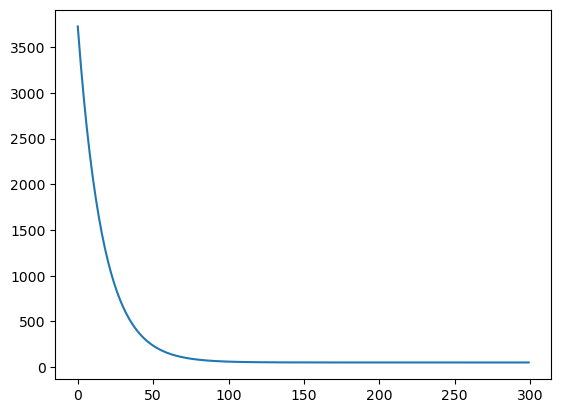

In [49]:
# Prediction evolution
plt.plot(range(itterations), COST)

In [50]:
R2(Y, model(X1, THETA))

0.9876681385882522

In [51]:
# Polynomial model
Y = Y + abs(Y)/2 # We change a little bit the target to have a clear polynomial form
start = time()
THETA, COST = gradient_descent(X2, Y, THETA2, learning_rate, itterations)

print("Training time : ", time()-start)

Training time :  0.02842116355895996


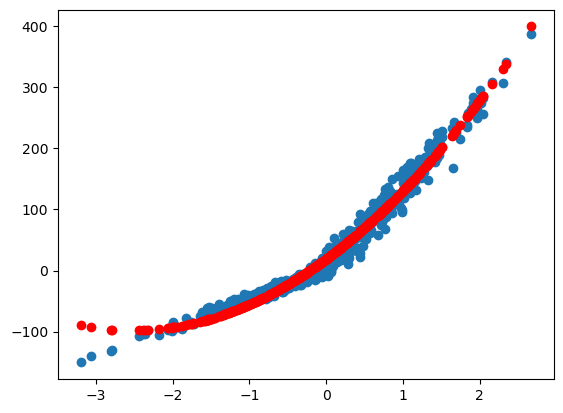

In [52]:
plt.scatter(X, Y)
plt.scatter(X, model(X2, THETA), c='red')

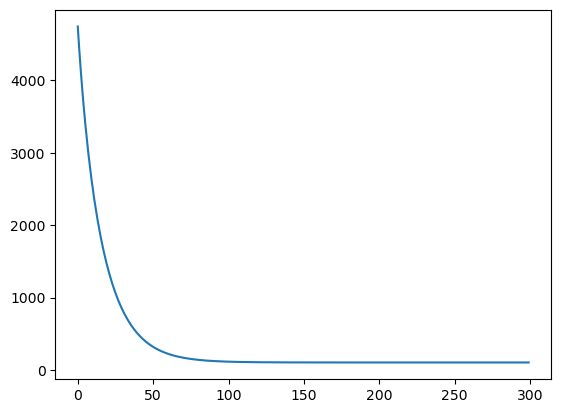

In [53]:
plt.plot(range(itterations), COST)

In [54]:
R2(Y, model(X2, THETA))

0.9760478021603098